In [1]:
from utility.readCsvFile import openCSVFile, readAllCSVFile, readRedTeam
import numpy as np

In [2]:
#mapnames to numbers
#mapUserComputerList[number] = name
mapUserComputerList = []

In [3]:
#test
data,_ = openCSVFile("data/authpartitionaa", mapUserComputerList)
print(data)

[[0, 0, 0], [1, 1, 0], [2, 2, 0], [3, 3, 0], [4, 4, 0], [5, 5, 0], [1, 1, 0], [6, 6, 0], [7, 7, 0], [8, 8, 0], [9, 9, 0], [10, 10, 0], [11, 11, 0], [12, 12, 0], [13, 13, 0], [1, 1, 0], [14, 14, 0], [0, 0, 0], [15, 15, 0], [16, 16, 0], [17, 17, 0], [18, 18, 0], [18, 18, 0], [18, 18, 0], [18, 18, 0], [19, 19, 0], [20, 20, 0], [1, 1, 0], [1, 1, 0], [21, 21, 0], [22, 22, 0], [23, 23, 0], [24, 24, 0], [25, 25, 0], [20, 20, 0], [23, 23, 0], [1, 1, 0], [8, 8, 0], [11, 11, 0], [26, 26, 0], [26, 26, 0], [27, 27, 0], [28, 28, 0], [29, 29, 0], [30, 30, 0], [31, 31, 0], [32, 32, 0], [33, 33, 0], [34, 34, 0], [25, 25, 0], [8, 8, 0], [23, 23, 0], [20, 20, 0], [35, 35, 0], [24, 24, 0], [36, 36, 0], [37, 37, 0], [38, 38, 0], [1, 1, 0], [39, 39, 0], [40, 40, 0], [41, 41, 0], [42, 42, 0], [43, 43, 0], [44, 44, 0], [45, 45, 0], [46, 46, 0], [47, 47, 0], [24, 24, 0], [25, 25, 0], [48, 48, 0], [49, 49, 0], [50, 50, 0], [51, 51, 0], [23, 23, 0], [23, 23, 0], [23, 23, 0], [52, 52, 0], [53, 53, 0], [54, 54, 0

In [4]:
#test on one file
np.array(data)
print(np.shape(data))

(3000, 3)


In [5]:
#read all files
fileNamePrefix = "data/authpartition"
data, mapList = readAllCSVFile(fileNamePrefix)


In [6]:
#check data shape
nparrayData = np.array(data)
print(np.shape(nparrayData))

(2028000, 3)


In [7]:
#separate X,y

X = nparrayData[:,[0,1]]
y = nparrayData[:,[2]]

print(np.shape(X))
print(np.shape(y))

(2028000, 2)
(2028000, 1)


In [8]:
#decision tree
from sklearn import tree

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=110041455, shuffle=False)

In [10]:
decisiontree = tree.DecisionTreeClassifier()
decisiontree = decisiontree.fit(X_train,y_train.ravel())

[Text(121.63568014705882, 213.25846153846155, 'X[0] <= 1562.5\ngini = 0.013\nsamples = 1825200\nvalue = [1812922, 12278]'),
 Text(44.74713235294117, 204.89538461538461, 'X[1] <= 85.5\ngini = 0.008\nsamples = 1364962\nvalue = [1359447, 5515]'),
 Text(13.712941176470588, 196.53230769230768, 'X[1] <= 25.5\ngini = 0.005\nsamples = 748291\nvalue = [746529, 1762]'),
 Text(8.752941176470587, 188.16923076923078, 'X[0] <= 23.5\ngini = 0.006\nsamples = 562531\nvalue = [560860, 1671]'),
 Text(6.418823529411764, 179.80615384615385, 'X[0] <= 1.5\ngini = 0.004\nsamples = 419949\nvalue = [419179, 770]'),
 Text(5.251764705882353, 171.44307692307692, 'gini = 0.0\nsamples = 118459\nvalue = [118459, 0]'),
 Text(7.5858823529411765, 171.44307692307692, 'X[0] <= 8.5\ngini = 0.005\nsamples = 301490\nvalue = [300720, 770]'),
 Text(4.668235294117647, 163.07999999999998, 'X[1] <= 7.5\ngini = 0.013\nsamples = 94786\nvalue = [94170, 616]'),
 Text(3.501176470588235, 154.71692307692308, 'X[0] <= 6.5\ngini = 0.006\n

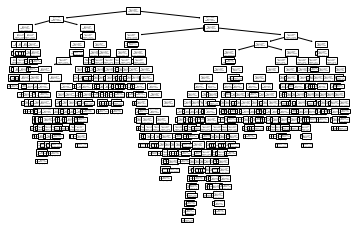

In [11]:
tree.plot_tree(decisiontree)

In [12]:
import pickle

In [13]:
folder = "classifier/"
classifierFileName = "DecisionTreeDefault.sav"
pickle.dump(decisiontree, open(folder+classifierFileName, "wb"))

In [14]:
"""
Load_decisionTree = pickle.load(open(folder+classifierFileName, "rb"))
"""

'\nLoad_decisionTree = pickle.load(open(folder+classifierFileName, "rb"))\n'

In [15]:
testFile = "data/redteam.txt"
testdata, mapList = readRedTeam(testFile, mapList)

In [16]:
testdata = np.array(testdata)

In [17]:
#separate testX,testy

testX = testdata[:,:2]
testy = testdata[:,[2]]

print(np.shape(testX))
print(np.shape(testy))

(749, 2)
(749, 1)


In [18]:
result = decisiontree.score(testX, testy)
print(result)

0.6702269692923899


In [19]:
correct = 0
incorrect = 0

for t in testX:
    result = decisiontree.predict([t])
    #print(result)
    #threshold 0.5
    if result>0.5:
        correct = correct + 1
    else:
        incorrect = incorrect + 1

In [20]:
print("correct: "+str(correct)+" incorrect: "+str(incorrect))

correct: 502 incorrect: 247


In [21]:
#test train data
correct = 0
falsepositive = 0
incorrect = 0
counter = 0
for t in X_test:
    result = decisiontree.predict([t])
    #print(result)
    #threshold 0.5
    if result>0.5 and (not y_test[counter] == 0):
        correct = correct + 1
    elif result < 0.5 and y_test[counter] == 0:
        falsepositive = falsepositive + 1
        correct = correct + 1
    else:
        incorrect = incorrect + 1
    counter = counter + 1

In [22]:
print("correct: "+str(correct)+" falsepositive: "+str(falsepositive)+" incorrect: "+str(incorrect))

correct: 201900 falsepositive: 201394 incorrect: 900
